In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

In [5]:
# 1) Data
df = sns.load_dataset("tips").copy()
print(df.shape); display(df.head())
display(df.info())
df["tip_pct"] = df["tip"] / df["total_bill"]
df = df[df["size"] > 0].copy()
cat_cols = ["sex", "smoker", "day", "time"]
for c in cat_cols: df[c] = df[c].astype("category")

(244, 7)


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


None

In [9]:
# 2) Data quality
missing = df.isna().mean().sort_values(ascending=False)
dups = df.duplicated().sum()
display(missing, dups)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

np.int64(1)

In [12]:
# 3) Quick stats
num_cols = df.select_dtypes(include=np.number).columns
display(df[num_cols].describe().T)

count       mean       std       min        25%       50%  \
total_bill  244.0  19.785943  8.902412  3.070000  13.347500  17.79500   
tip         244.0   2.998279  1.383638  1.000000   2.000000   2.90000   
size        244.0   2.569672  0.951100  1.000000   2.000000   2.00000   
tip_pct     244.0   0.160803  0.061072  0.035638   0.129127   0.15477   

                  75%        max  
total_bill  24.127500  50.810000  
tip          3.562500  10.000000  
size         3.000000   6.000000  
tip_pct      0.191475   0.710345

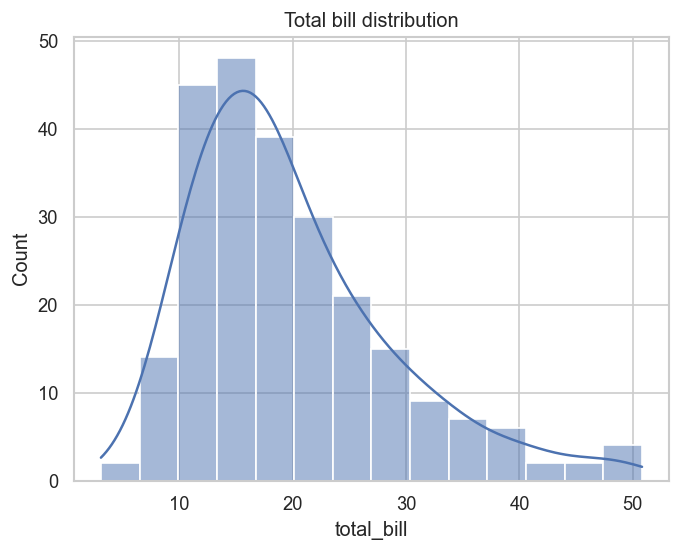

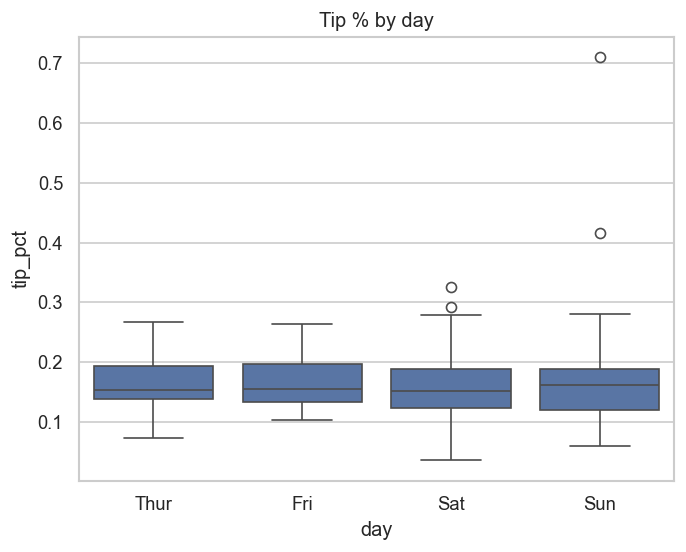

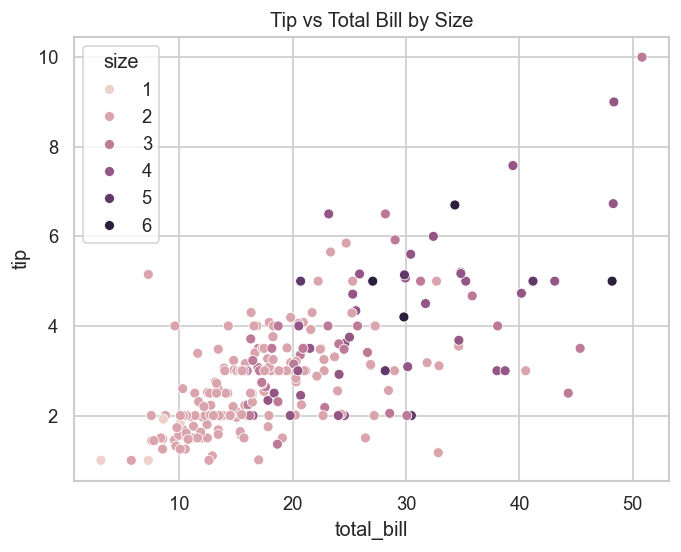

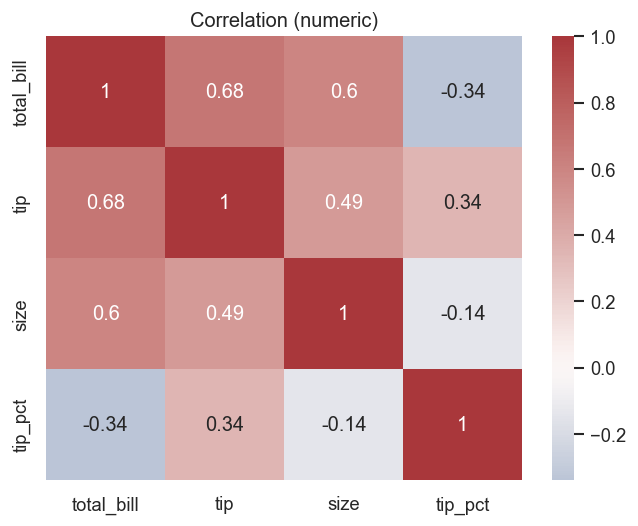

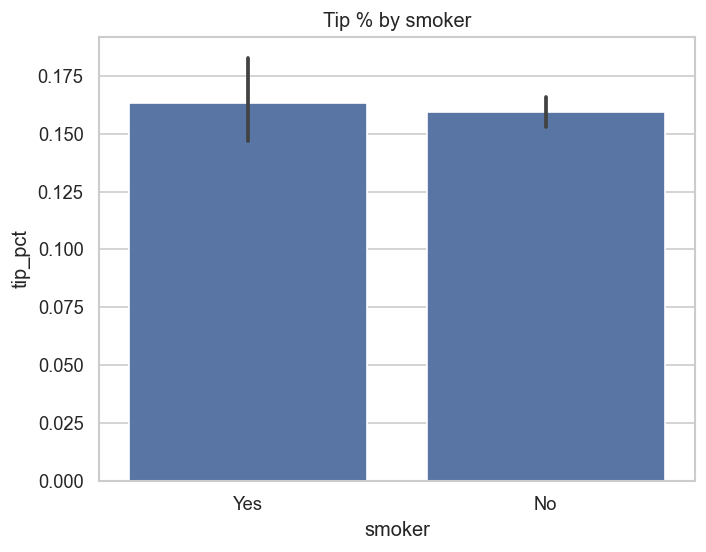

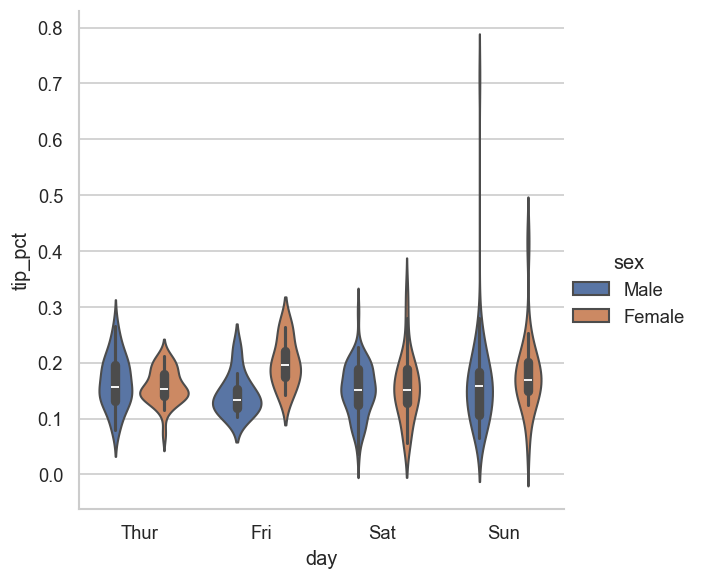

In [23]:
# 4) Plots (Ã¶rnekler)
sns.histplot(df["total_bill"], kde=True); plt.title("Total bill distribution"); plt.savefig("../projects/mini_eda_tips/figures/total_bill_hist.png"); plt.show()
sns.boxplot(data=df, x="day", y="tip_pct"); plt.title("Tip % by day"); plt.savefig("../projects/mini_eda_tips/figures/tip_pct_by_day.png"); plt.show()
sns.scatterplot(data=df, x="total_bill", y="tip", hue="size"); plt.title("Tip vs Total Bill by Size"); plt.savefig("../projects/mini_eda_tips/figures/tip_vs_bill_size.png"); plt.show()
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="vlag", center=0); plt.title("Correlation (numeric)"); plt.savefig("../projects/mini_eda_tips/figures/corr_heatmap.png"); plt.show()
sns.barplot(data=df, x="smoker", y="tip_pct"); plt.title("Tip % by smoker"); plt.savefig("../projects/mini_eda_tips/figures/tip_pct_smoker.png"); plt.show()
sns.catplot(data=df, x="day", y="tip_pct", hue="sex", kind="violin"); plt.savefig("../projects/mini_eda_tips/figures/tip_pct_day_sex.png"); plt.show()